In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix as CM 
from sklearn import model_selection 
from sklearn.model_selection import learning_curve 
from sklearn.metrics import precision_recall_curve 


In [69]:
%matplotlib inline
data = pd.read_csv("C:/Users/jstep/Downloads/german_credit_data/german.data", sep=" ",header=None)
col_mapping = {0:"checking_account", 
               1:"duration",
               2:"credit_history",
               3:"purpose",
               4:"credit_amt",
               5:"savings_acct",
               6:"employment",
               7:"installment_rate_percent",
               8:"gender_status",
               9:"other_debtors",
              10:"residence_since",
              11:"property",
              12:"age",
              13:"other_installment_plans",
              14:"housing",
              15:"no_existing_credits",
              16:"job",
              17:"no_people_liable",
              18:"has_telephone",
              19:"is_foreign_worker",
              20:"good_bad"}
data.columns = [col_mapping[col] for col in data.columns]
data["good_bad"] = np.where(data["good_bad"] == 2, 1, 0)


In [49]:
# randomly introduce NAs just to work through pandas data manipulation
for col in data.columns:
    data.loc[data.sample(frac=0.001).index, col] = pd.np.nan

C:\Users\jstep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# identify rows with at least 1 NA - usefull for understanding amount of NANs
data.iloc[pd.isnull(data).any(1).to_numpy().nonzero()[0]]

,checking_account,duration,credit_history,purpose,credit_amt,savings_acct,employment,installment_rate_percent,gender_status,other_debtors,...,property,age,other_installment_plans,housing,no_existing_credits,job,no_people_liable,has_telephone,is_foreign_worker,good_bad
31,A11,24.0,A32,A42,NaN,A61,A73,2.0,A93,A101,...,A123,27.0,A142,A152,1.0,A173,1.0,A191,A201,1.0
50,A12,24.0,A33,NaN,2333.0,A65,A72,4.0,A93,A101,...,A122,29.0,A141,A152,1.0,A172,1.0,A191,A201,1.0
82,A14,18.0,A32,A49,1568.0,A62,A73,3.0,NaN,A101,...,A122,24.0,A143,A151,1.0,A172,1.0,A191,A201,1.0
89,A11,12.0,A30,A45,1108.0,A61,A74,4.0,A93,A101,...,A121,28.0,A143,A152,2.0,A173,1.0,A191,A201,NaN
113,A14,36.0,A34,A40,7855.0,A61,A73,4.0,A92,A101,...,A121,25.0,A142,A152,2.0,A173,NaN,A192,A201,2.0
228,NaN,9.0,A32,A43,1478.0,A61,A74,4.0,A93,A101,...,A123,22.0,A143,A152,1.0,A173,1.0,A191,A201,2.0
272,A12,48.0,A31,A40,12169.0,A65,A71,4.0,A93,A102,...,A124,36.0,NaN,A153,1.0,A174,1.0,A192,A201,1.0
293,A13,42.0,A34,A41,4796.0,A61,A75,4.0,A93,A101,...,A124,NaN,A143,A153,1.0,A173,1.0,A191,A201,1.0
357,A14,36.0,A33,A43,4463.0,A61,A73,NaN,A93,A101,...,A123,26.0,A143,A152,2.0,A174,1.0,A192,A201,2.0
378,A12,36.0,A32,A40,14318.0,A61,A75,4.0,A93,A101,...,A124,57.0,A143,A153,1.0,NaN,1.0,A192,A201,2.0


In [51]:
# fill the integer rows with the mean of the data
data = data.fillna(data.mean())

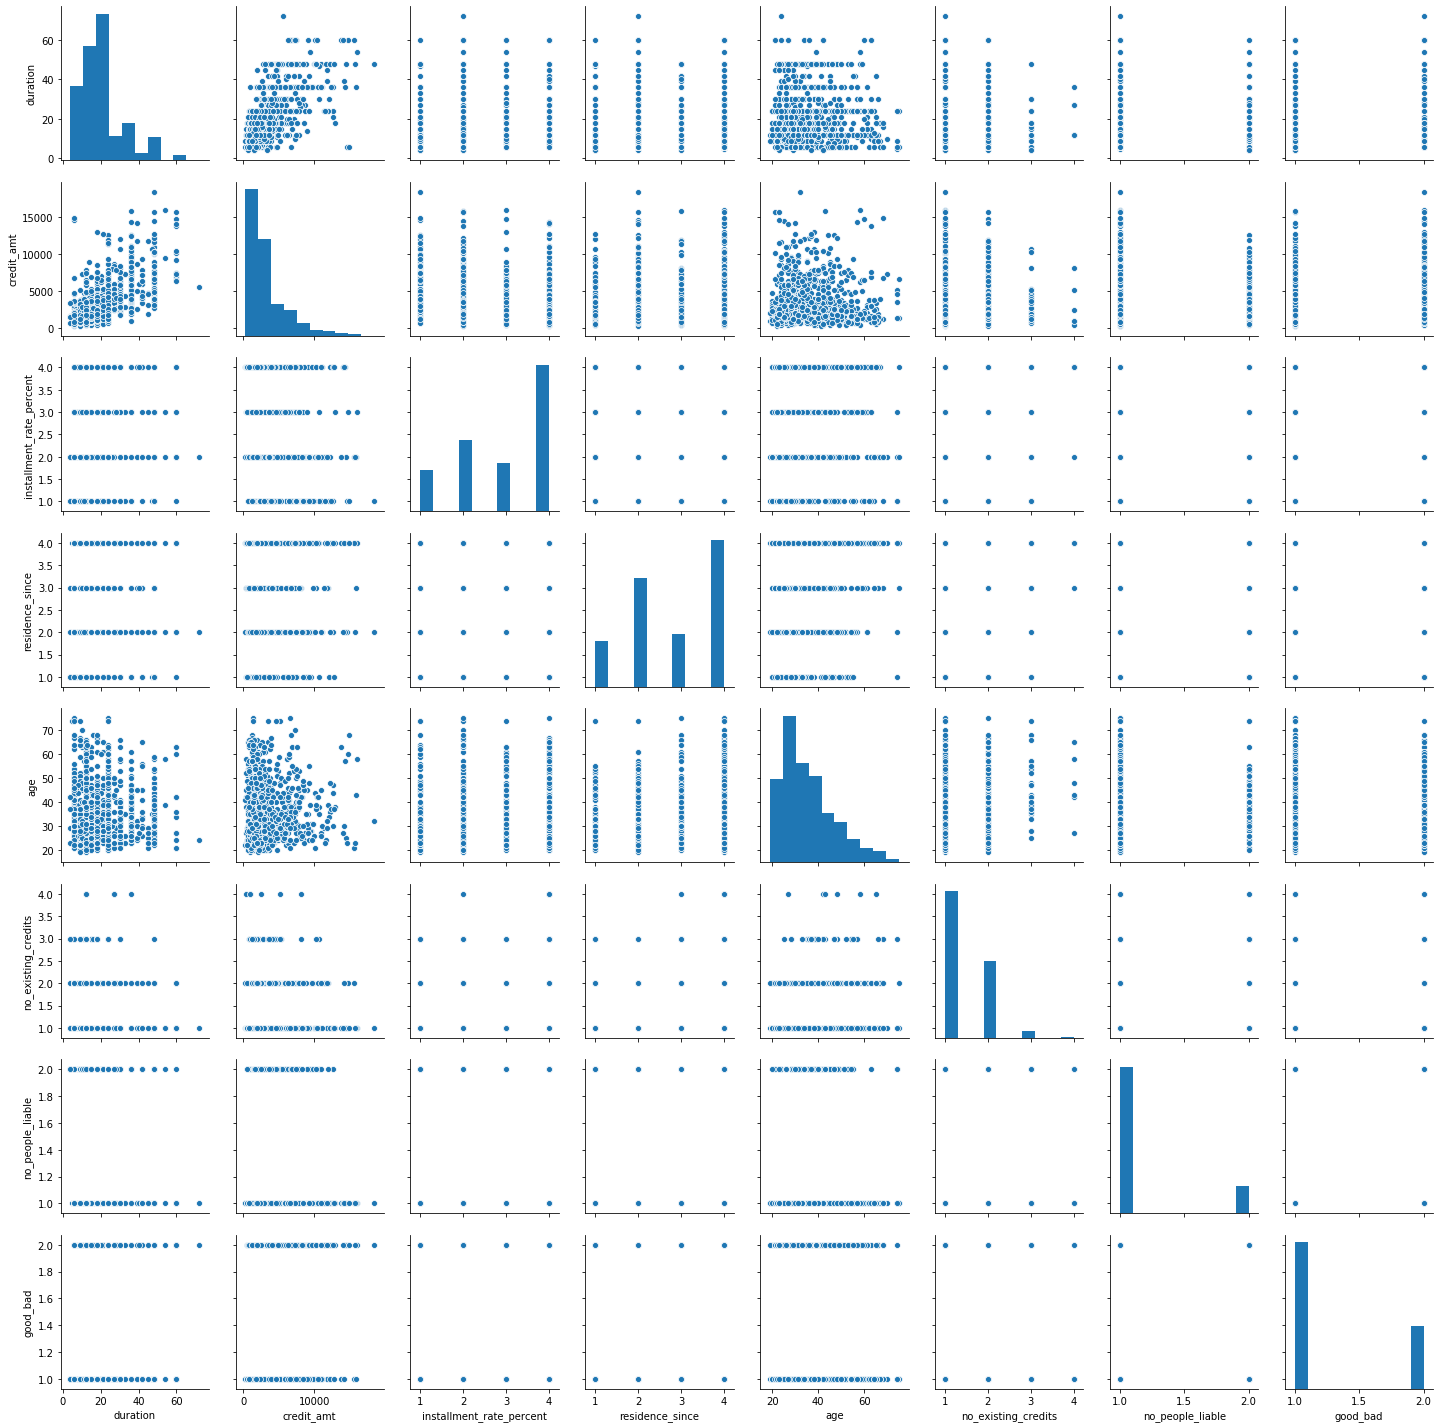

In [57]:
# pairplot all vs all to see scope
import seaborn as sns
sns.pairplot(data)

In [ ]:
# Insights
# - most people are between ages 20 and 40
# - credit amounts are mostly between 0 to 10,000


C:\Users\jstep\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jstep\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


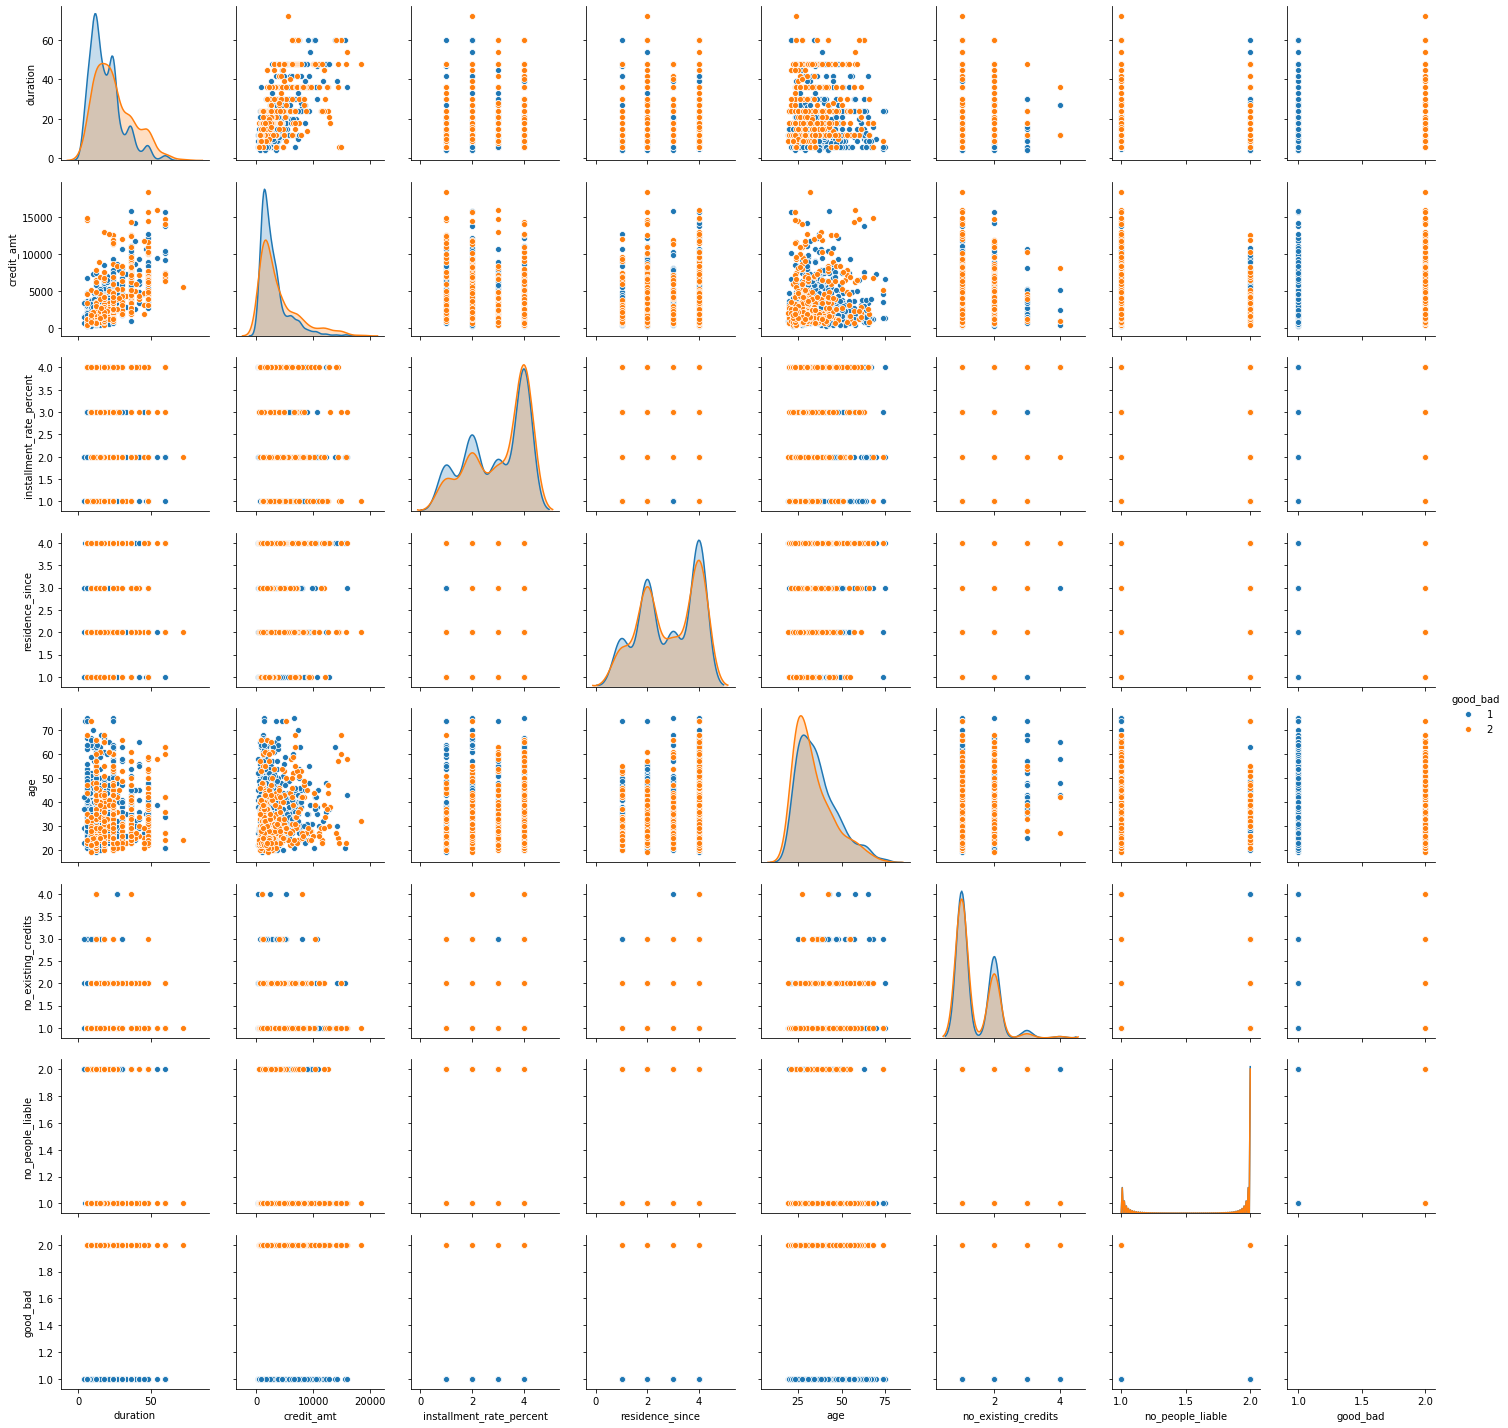

In [58]:
sns.pairplot(data, hue="good_bad")

In [ ]:
# age doesn't tell us much about whether someone is good or bad

<Figure size 432x288 with 0 Axes>

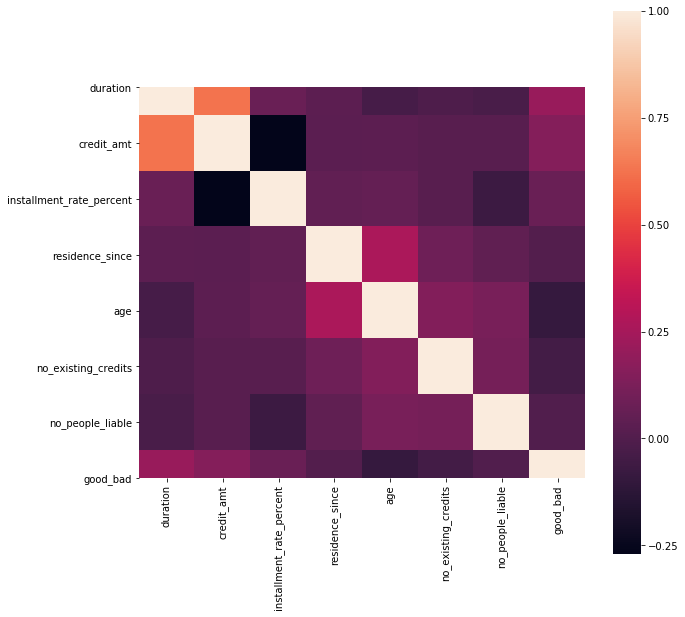

In [63]:
# build heat map
import matplotlib.pyplot as plt
plt.figure()
corr_matrix = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, square=True)

In [85]:
# models
classifier_list = ["Logistic_Regression","Random_Forest","Gradient_Boosting", "KNN"]
classifier_models = {
               'Logistic_Regression': LogisticRegression(class_weight='balanced'),
               'Random_Forest': RandomForestClassifier(n_estimators=50, class_weight='balanced'),
               'Gradient_Boosting': GradientBoostingClassifier(max_depth=5),
               'K_NN': KNeighborsClassifier(n_neighbors=5, weights='distance')
}

n_runs = 10
test_size = 0.3


In [31]:
data.dtypes[data.dtypes == "object"].keys()

Index(['checking_account', 'credit_history', 'purpose', 'savings_acct',
       'employment', 'gender_status', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'has_telephone',
       'is_foreign_worker'],
      dtype='object')

In [23]:
data.groupby("checking_account")["good_bad"].mean()

checking_account
A11    1.492701
A12    1.390335
A13    1.222222
A14    1.116751
Name: good_bad, dtype: float64

In [63]:
signals_df = data[[c for c in data.columns if c != 'good_bad']].values
response = data['good_bad'].values

In [64]:
train_signals, test_signals, train_labels, test_labels = train_test_split(signals_df, response, test_size=test_size)

In [81]:
def encode_split(data):
    msk = np.random.rand(len(data)) < 0.8
    train = data[msk]
    test = data[~msk]
    categorical_cols = list(train.dtypes[train.dtypes == "object"].keys())

    for col in categorical_cols:
        encoding = train.groupby(col)["good_bad"].mean()
        train[col] = train[col].map(encoding).fillna(np.mean(train["good_bad"]))
        test[col] = test[col].map(encoding).fillna(np.mean(train["good_bad"]))

    train_signals = np.asarray(train.drop(["good_bad"], axis=1))
    test_signals = np.asarray(test.drop(["good_bad"], axis=1))
    train_labels = np.asarray(train["good_bad"])
    test_labels = np.asarray(test["good_bad"])
    
    return train_signals, test_signals, train_labels, test_labels


In [86]:
score_ls = []
for ic, (cl_name, Classifier) in enumerate(classifier_models.items()):
    for trial in range(n_runs):
        train_signals, test_signals, train_labels, test_labels = encode_split(data)
        Classifier.fit(train_signals, train_labels)
        pred_labels = Classifier.predict(test_signals)
        precision = precision_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, precision, 'Precision'])
        recall = recall_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, recall,'Recall'])
        F1 = f1_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, F1,'f1 Score'])


C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

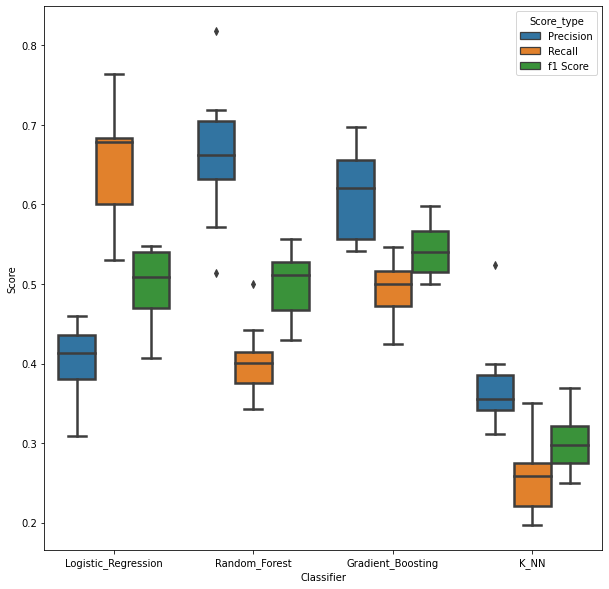

In [89]:
metrics_df = pd.DataFrame(score_ls, columns=['Classifier','Score','Score_type']) #building a dataframe with various metrics
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Classifier", y="Score", hue="Score_type", data=metrics_df, linewidth=2.5) #producing the bo

In [64]:
! git add .
! git commit -m "adding corr plots"
! git push

The file will have its original line endings in your working directory


[master b4812c3] adding corr plots
 1 file changed, 965 insertions(+), 807 deletions(-)
 rewrite workflow.ipynb (61%)


To https://github.com/jstephenj14/classification-model-workflow.git
   779d43e..b4812c3  master -> master
